In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:\deep learning\FB-stock-prices.csv")

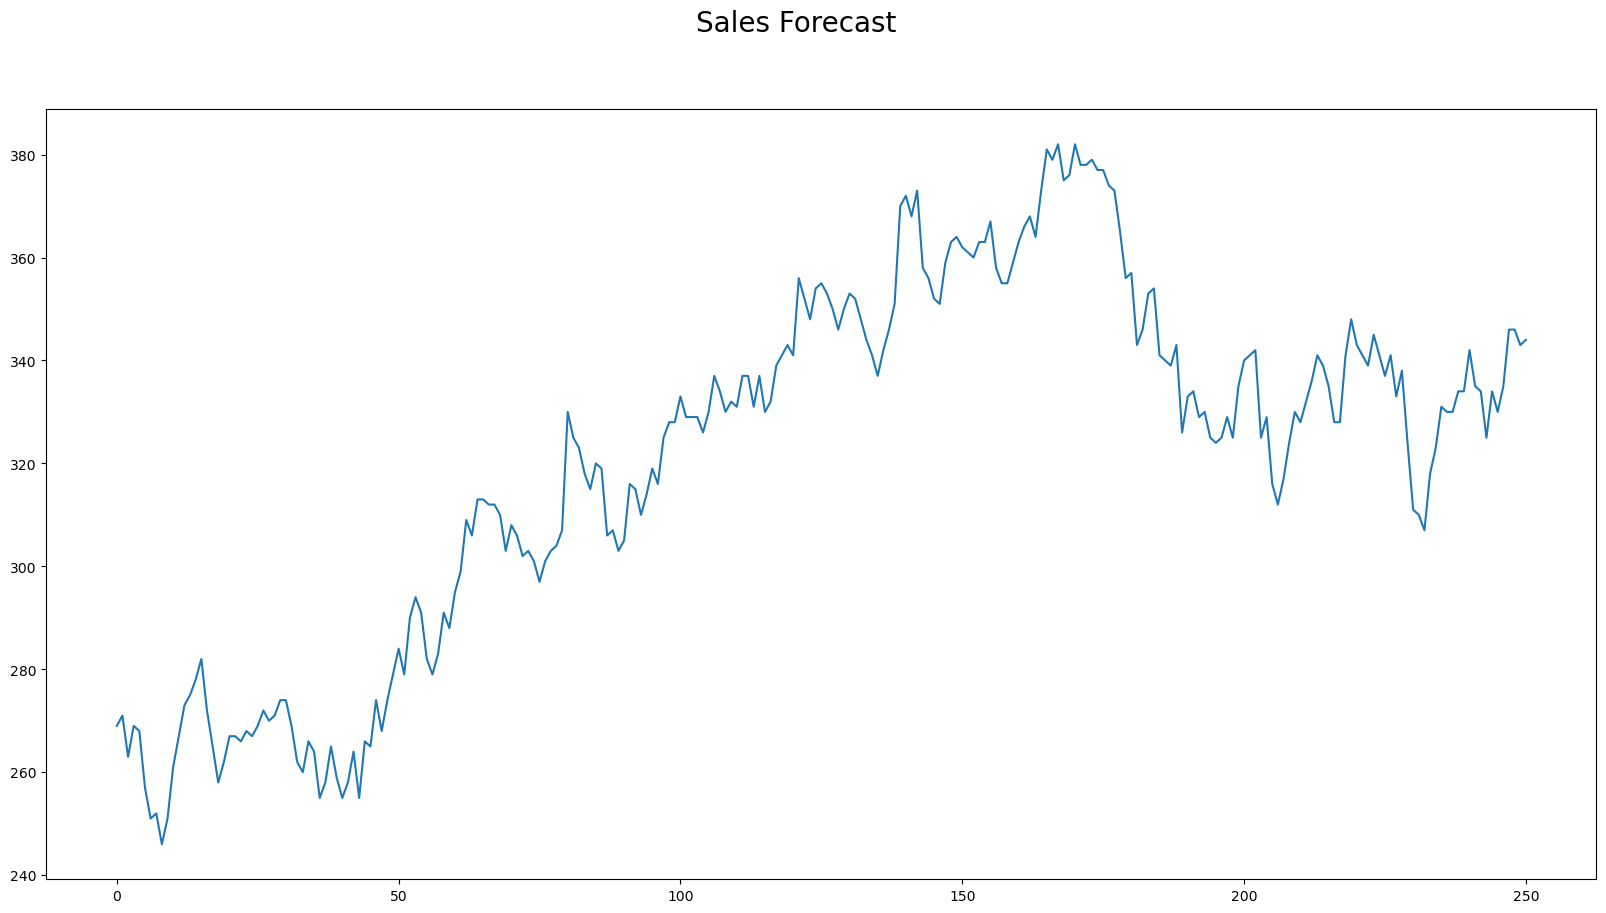

In [3]:
plt.figure(figsize = (20,10)).suptitle('Sales Forecast',fontsize = 20)
plt.plot('Price',data =df)


In [4]:
#scaling 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(df[['Price']].values)

In [5]:
test_size = 50
total_size = len(scaled_prices)
train_size = total_size - test_size
train_req = scaled_prices[:train_size,:]
test_req = scaled_prices[train_size:,:]

In [6]:
def data_ready(data,lookback = 1):
    data_x,data_y = [],[]
    for i in range(len(data)-lookback-1):
        a = data[i:(i+ lookback), 0]
        data_x.append(a)
            #The next point
        data_y.append(data[i + lookback, 0])
    return np.array(data_x),np.array(data_y)

In [7]:
lookback = 25

In [8]:
train_req.shape

(201, 1)

In [9]:
x_train,y_train = data_ready(train_req,25)

In [10]:
y_train.shape

(175,)

In [11]:
x_train=x_train.reshape(x_train.shape[0],1,x_train.shape[1])

In [12]:
x_train

array([[[0.16911765, 0.18382353, 0.125     , ..., 0.14705882,
         0.16176471, 0.15441176]],

       [[0.18382353, 0.125     , 0.16911765, ..., 0.16176471,
         0.15441176, 0.16911765]],

       [[0.125     , 0.16911765, 0.16176471, ..., 0.15441176,
         0.16911765, 0.19117647]],

       ...,

       [[0.97058824, 0.97794118, 0.96323529, ..., 0.58088235,
         0.57352941, 0.58088235]],

       [[0.97794118, 0.96323529, 0.96323529, ..., 0.57352941,
         0.58088235, 0.61029412]],

       [[0.96323529, 0.96323529, 0.94117647, ..., 0.58088235,
         0.61029412, 0.58088235]]])

In [13]:
import keras 

In [14]:
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Dense

In [15]:
x_train.shape

(175, 1, 25)

In [16]:
model = Sequential()

In [17]:
model.add(SimpleRNN(units = 32,input_shape = (1,lookback)))

In [18]:
model.add(Dense(units = 1))

In [19]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ['mse'])

In [20]:
history = model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
6/6 [==============================] - 2s 4ms/step - loss: 1.7525 - mse: 1.7525
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5257 - mse: 0.5257
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0793 - mse: 0.0793
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0567 - mse: 0.0567
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1015 - mse: 0.1015
Epoch 6/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0731 - mse: 0.0731
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0341 - mse: 0.0341
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0258 - mse: 0.0258
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0309 - mse: 0.0309
Epoch 10/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0279 - mse: 0.0279


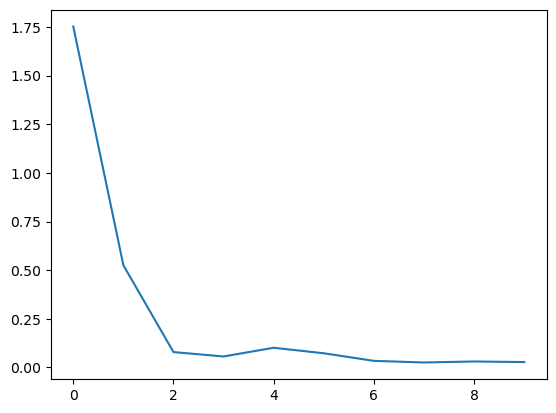

In [21]:
plt.plot(history.history['mse'],label = 'mse')
plt.show()

In [22]:
x_test,y_test = data_ready(test_req,25)
x_test = x_test.reshape(x_test.shape[0],1,x_test.shape[1])

In [23]:
model.evaluate(x_test)

1/1 [==============================] - 0s 216ms/step - loss: 0.0000e+00 - mse: 0.0000e+00


[0.0, 0.0]

In [24]:
y_test_p = model.predict(x_test)
orig_test_values = df[["Price"]].loc[total_size-len(y_test_p):]
orig_test_values.reset_index(drop=True, inplace=True)


1/1 [==============================] - 0s 195ms/step


In [25]:
#y_train_p = scaler.inverse_transform(y_train_p)
y_test_pi = scaler.inverse_transform(y_test_p)

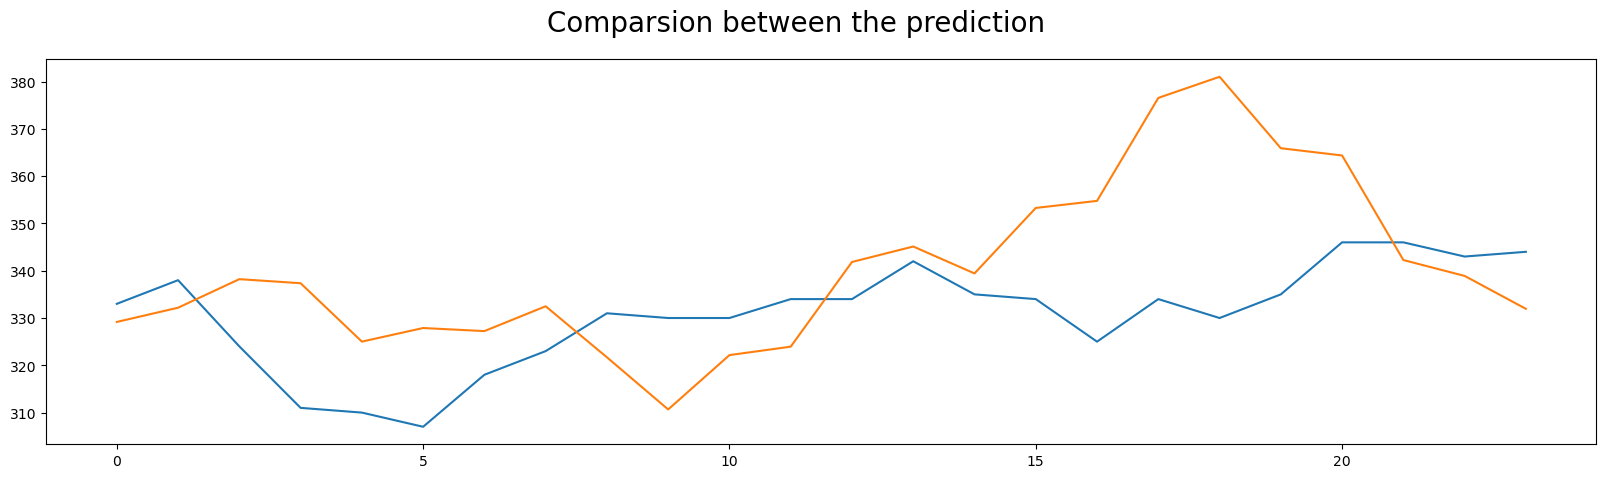

In [26]:
plt.figure(figsize = (20,5)).suptitle('Comparsion between the prediction',fontsize = 20)
plt.plot(orig_test_values)
plt.plot(y_test_pi)